In [7]:
# ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
from torch import nn,optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import transforms
from torchinfo import summary
from torch.autograd import Variable
print(f"cuda, {torch.cuda.is_available()}")

cuda, False


            cloud  wind  ave_tmp  max_tmp  min_tmp  rain
2018-05-17    9.0   3.7     24.0     28.4     21.4   0.0
2018-05-18    7.8   3.0     23.4     27.1     20.0   0.0
2018-05-19    7.5   3.9     21.5     26.3     15.3   0.0
2018-05-20    4.3   3.5     16.8     22.1     13.1   0.0
2018-05-21   10.0   2.4     20.3     27.2     13.7   0.0


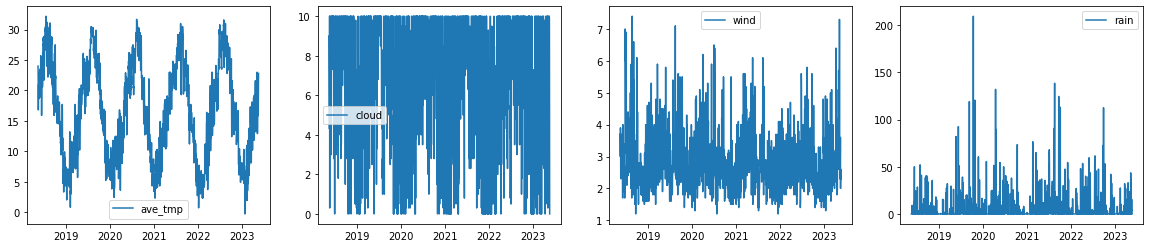

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/aweglteo/tokyo_weather_data/main/data.csv", parse_dates=True, index_col=0)
print(df.head())

# 各データをsubplotでプロット
plt.figure(figsize=(20, 4))
for i, column in enumerate(['ave_tmp', 'cloud', 'wind', 'rain'], start=1):
    plt.subplot(1, 4, i)
    plt.plot(df[column], label=column)
    plt.legend()
plt.show()

class tokyo_weather_Dataset(torch.utils.data.Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, index):
        return (self.data[index:index+self.seq_length], self.data[index+1:index+self.seq_length+1])

Epoch [10/100], Loss: 0.0007
Epoch [20/100], Loss: 0.0004
Epoch [30/100], Loss: 0.0003
Epoch [40/100], Loss: 0.0003
Epoch [50/100], Loss: 0.0002
Epoch [60/100], Loss: 0.0002
Epoch [70/100], Loss: 0.0002
Epoch [80/100], Loss: 0.0002
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0002


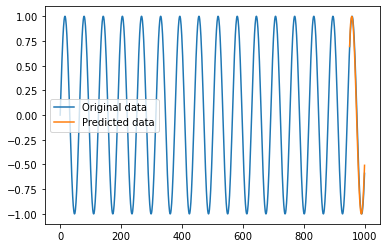

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# データ生成
def generate_sine_wave(seq_length):
    x = np.arange(seq_length)
    y = np.sin(x / 10)
    return y

# データセットクラス
class SineWaveDataset(torch.utils.data.Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, index):
        return (self.data[index:index+self.seq_length], self.data[index+1:index+self.seq_length+1])

# LSTMモデル
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out)
        return out

# ハイパーパラメータ
input_size = 1
hidden_size = 64
num_layers = 1
output_size = 1
seq_length = 50
num_epochs = 100
learning_rate = 0.01

# データセットとデータローダー
data = generate_sine_wave(1000)
dataset = SineWaveDataset(data, seq_length)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

# モデル、損失関数、オプティマイザー
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 学習
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        inputs = inputs.view(-1, seq_length, input_size).float()
        targets = targets.view(-1, seq_length, output_size).float()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 推論（未来のデータ予測）
model.eval()
with torch.no_grad():
    test_input = torch.tensor(data[-seq_length:]).float().view(1, seq_length, input_size)
    predicted = model(test_input).view(-1).numpy()

# 結果のプロット
plt.plot(data, label='Original data')
plt.plot(np.arange(len(data)-seq_length, len(data)), predicted, label='Predicted data')
plt.legend()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

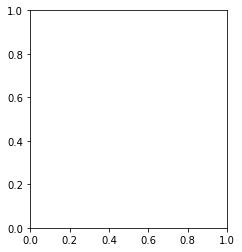

In [4]:
# 推論（未来のデータ予測）
model.eval()
with torch.no_grad():
    test_input = torch.tensor(data[-seq_length:]).float().unsqueeze(0)
    predicted = model(test_input).squeeze(0).numpy()

# 結果のプロット
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(data[-seq_length:, 0], label='Original')
plt.plot(predicted[-seq_length:], label='Predicted')
plt.title("temperature")
plt.legend()
plt.tight_layout()
plt.show()


### 入力を変更してモデルを試す

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 擬似的な気象データの生成
def generate_weather_data(num_days):
    np.random.seed(0)
    temperature = np.sin(np.arange(num_days) / 20) * 10 + 20  # 気温
    rainfall = np.abs(np.random.normal(0, 2, num_days))  # 雨量
    humidity = np.random.uniform(50, 100, num_days)  # 湿度
    wind_speed = np.random.uniform(0, 10, num_days)  # 風速
    return np.vstack((temperature, rainfall, humidity, wind_speed)).T

# データセットクラス
class WeatherDataset(torch.utils.data.Dataset):
    def __init__(self, data, seq_length):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, index):
        print(self.data[index+self.seq_length, :])
        return (self.data[index:index+self.seq_length, :], self.data[index+self.seq_length, 0])

# LSTMモデル
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])  # 修正: 最後のタイムステップの出力のみを使用
        return out

# ハイパーパラメータ
input_size = 4
hidden_size = 64
num_layers = 1
output_size = 1
seq_length = 30
num_epochs = 100
learning_rate = 0.01

# データセットとデータローダー
data = generate_weather_data(365)
dataset = WeatherDataset(data, seq_length)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

# モデル、損失関数、オプティマイザー
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 学習
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        inputs = inputs.float()
        targets = targets.float()

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 推論（未来の気温予測）
model.eval()
with torch.no_grad():
    test_input = torch.tensor(data[-seq_length:, :]).float().view(1, seq_length, input_size)
    predicted_temperature = model(test_input).item()

# 結果のプロット
plt.figure(figsize=(12, 4))
for i, feature in enumerate(['Temperature', 'Humidity', 'Wind Speed']):
    plt.subplot(1, 3, i+1)
    plt.plot(data[-seq_length:, i], label='Original')
    plt.plot(predicted[-seq_length:, i], label='Predicted')
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()